# Business Case:-

- **Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.**

# Problem Statement

- **Task 1:- Prepare a complete data analysis report on the given data.**

- **Task 2:- Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.**

----

# Attribute information:-
- 1. **Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.**
- 2. **Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.**
- 3. **Source: This column holds the name of the place from where the passenger’s journey will start.**
- 4. **Destination: This column holds the name of the place to where passengers wanted to travel.**
- 5. **Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.**
- 6. **Arrival_Time: Arrival time is when the passenger will reach his/her destination.**
- 7. **Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.**
- 8. **Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.**
- 9. **Additional_Info: In this column, we will get information about food, kind of food, and other amenities.**
- 10. **Price: Price of the flight for a complete journey including all the expenses before onboarding.**


----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)

In [1]:
# Read and explore data

In [3]:
df = pd.read_excel('Flight_Fare.xlsx')

In [4]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1881,SpiceJet,27/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
2527,Air India,1/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,07:55 02 May,22h 30m,1 stop,No info,8366
1621,SpiceJet,15/05/2019,Banglore,Delhi,BLR → DEL,09:30,12:20,2h 50m,non-stop,No check-in baggage included,4319
5726,IndiGo,1/03/2019,Chennai,Kolkata,MAA → CCU,14:40,17:05,2h 25m,non-stop,No info,7295
9537,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → HYD → COK,09:45,16:10,6h 25m,1 stop,No info,9646


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [6]:
df.describe(include="O").T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.isnull().sum() # Null values are there

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.shape

(10683, 11)

In [11]:
df.dropna(inplace=True) # Null values removed

In [12]:
df.duplicated().sum() # Duplicated values are there

220

In [13]:
df.drop_duplicates(inplace=True) # Dropped all the duplicated values

# Data Preprocessing

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Numrical features

#### Date_of_Journey

In [15]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"]) 
# Converting "Date_of_Journey" into datetime feautre then extracting all the important information

In [16]:
df["Journey_Day"] = df["Date_of_Journey"].dt.day 

In [17]:
df["Journey_Month"] = df["Date_of_Journey"].dt.month

In [18]:
df["Journey_DOW"] = df["Date_of_Journey"].dt.dayofweek

In [19]:
df.drop("Date_of_Journey",axis=1,inplace=True)

#### Dep_Time

In [20]:
# Converting "Dep_time" into datatime and extracting important features
df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

In [21]:
df["Dep_Minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [22]:
df.drop("Dep_Time",axis=1,inplace=True)

#### Arrival_Time

In [23]:
# Converting "Arrival_time" into datatime and extracting important features
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

In [24]:
df["Arrival_Minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

In [25]:
df.drop("Arrival_Time",axis=1,inplace=True)

#### Duration

In [26]:
# Connverting this column into total number of minutes combining hours and minutes
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

### Categorical features

#### Total_Stops

In [27]:
df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [28]:
# Categorical to numerical column
df["Total_Stops"] = df["Total_Stops"].replace({"non-stop" : 0,
                                                         "1 stop" : 1,
                                                         "2 stops" : 2,
                                                         "3 stops" : 3,
                                                         "4 stops" : 4})

#### Additional_Info  

In [29]:
df.Additional_Info.value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [30]:
df.Additional_Info=df.Additional_Info.map({'No info':8,'No Info':8,'In-flight meal not included':7,'No check-in baggage included':6,'1 Long layover':5,'Change airports':4,'Business class':3,'1 Short layover':2,'Red-eye flight':1,'2 Long layover':0})

#### Airline

In [31]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()

In [32]:
df["Airline"].value_counts().sort_index()

Airline
Air Asia                              319
Air India                            1694
GoAir                                 194
IndiGo                               2043
Jet Airways                          3700
Jet Airways Business                    6
Multiple carriers                    1196
Multiple carriers Premium economy      13
SpiceJet                              815
Trujet                                  1
Vistara                               478
Vistara Premium economy                 3
Name: count, dtype: int64

In [33]:
df["Airline"] = le.fit_transform(df["Airline"]) # Applying LabelEncoder

#### Source

In [34]:
df["Source"].value_counts().sort_index()

Source
Banglore    2179
Chennai      381
Delhi       4345
Kolkata     2860
Mumbai       697
Name: count, dtype: int64

In [35]:
df['Source'] = le.fit_transform(df['Source']) # Applying LabelEncoder

#### Destination

In [36]:
df["Destination"].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [37]:
df['Destination'] = le.fit_transform(df['Destination']) # Applying LabelEncoder

In [38]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_DOW,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,3,0,5,BLR → DEL,170,0,8,3897,24,3,6,22,20,1,10
1,1,3,0,CCU → IXR → BBI → BLR,445,2,8,7662,1,5,2,5,50,13,15


# EDA 

## Univarate Analysis

<Axes: xlabel='Journey_DOW', ylabel='count'>

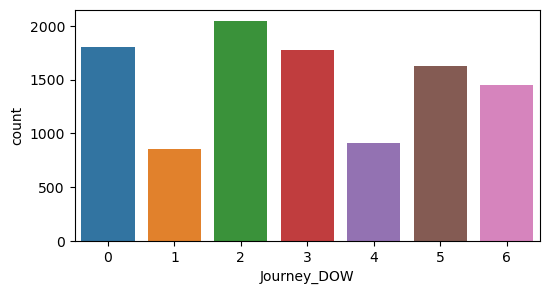

In [39]:
plt.figure(figsize=(6,3))
sns.countplot(x="Journey_DOW", data=df)

### Insights of Days of week 

- 1. More than **1500 passenger's** are travelling on **Monday, Wednesday, Thrusday, and Saturday** day of week.
- 2. Very less number of passenger's are travelling during **Tuesday or Friday** day of week.

<Axes: xlabel='Journey_Month', ylabel='count'>

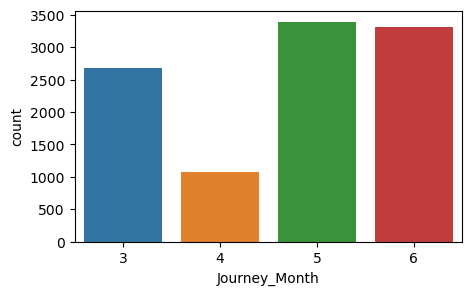

In [40]:
plt.figure(figsize=(5,3))
sns.countplot(x="Journey_Month", data=df)

### Insights of Month

- 1. More than 3000 passenger's are travelling during **May and June** months.
- 2. Very less number of passneger's are travelling during **April** month as compared to other months

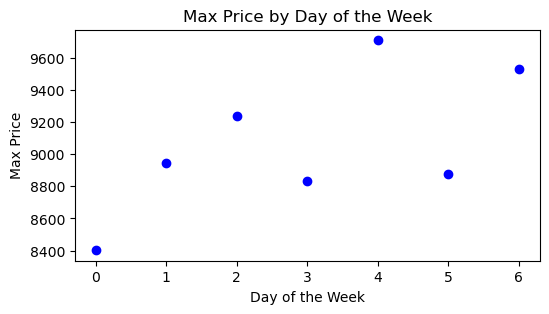

In [41]:
max_prices = df.groupby("Journey_DOW")["Price"].mean()
plt.figure(figsize=(6, 3))
plt.scatter(max_prices.index, max_prices.values, color='b', marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Max Price')
plt.title('Max Price by Day of the Week')
plt.show()

### Insights from Maximum Price by Day of week

- 1. **4th day** of week has the highest pricing as compared to rest of the day's.
- 2. **0th day** of the week has the lowest price among all the days.
- 3. On avg the Maximum Price is around **9000 rupees**.

<Axes: xlabel='Total_Stops', ylabel='count'>

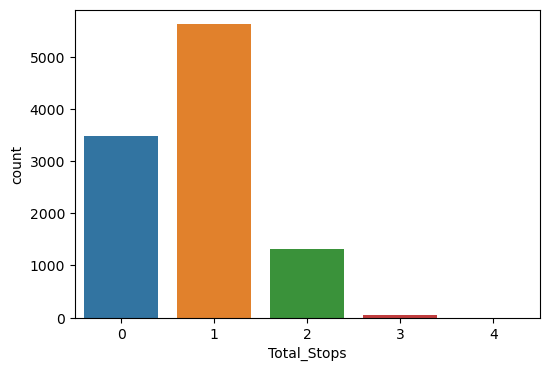

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x="Total_Stops", data=df)

### Insights for Total stops

- 1. **0 Stop**, **1 Stop** has highest frequency than all the other stops. So ,we can say that most passenger are preferring **1 stop**.
- 2. We can clearly see that **3 and 4 stops** has very less frequency. So ,we can say that as the stops is increasing number of passenger is decreasing.

<Axes: xlabel='Destination', ylabel='count'>

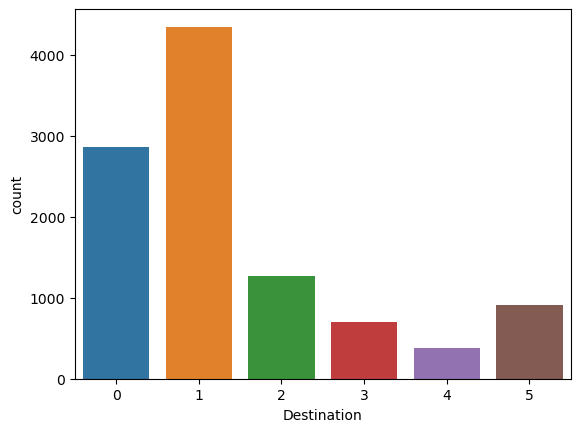

In [43]:
sns.countplot(x="Destination",data=df)

### Insights for Destination

- 1. More than 4000 passenger has **Cochin** as their destination. Also, frequency for **Cochin** is highest compared to other Destination.
- 2. Very less passenger has **Kolkata** as their destination.

<Axes: xlabel='Duration', ylabel='Count'>

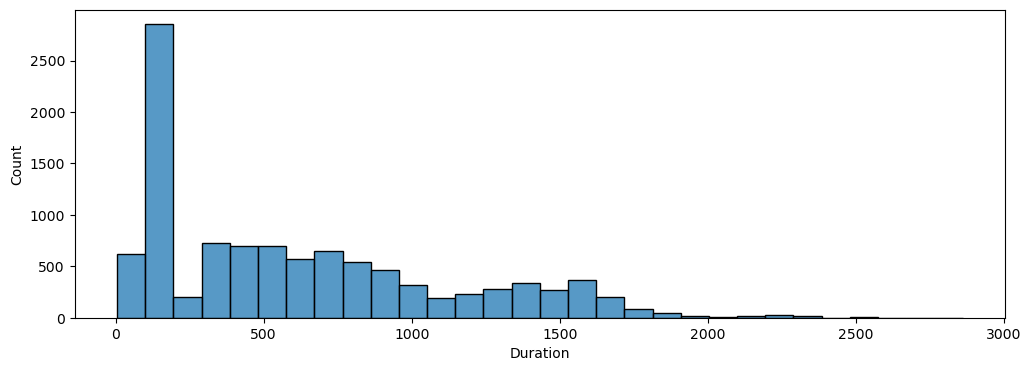

In [44]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x="Duration",bins=30)

### Insights of Duration in Minutes

- 1. We can see the graph is left skewed.
- 2. Most of the flights duration is between **400 to 800 minutes**.
- 3. At **200 minutes** we can see more than 2500 flights are arriving.
- 4. As we move above **1500 minutes** we can see the number flights arrival is decreasing. So, we can say that less number of passenger wants to travel flight long flight's.

<Axes: xlabel='Arrival_Hour', ylabel='Count'>

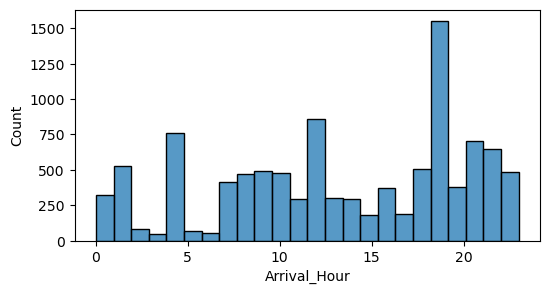

In [45]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="Arrival_Hour",bins=24)

### Insights of Arrival hour of flight

- 1. Most of the flight arrive at **19:00**.
- 2. Very less amount of flight arrive between **3am to 4am** and **5am to 6am**.

<Axes: xlabel='Dep_Hour', ylabel='Count'>

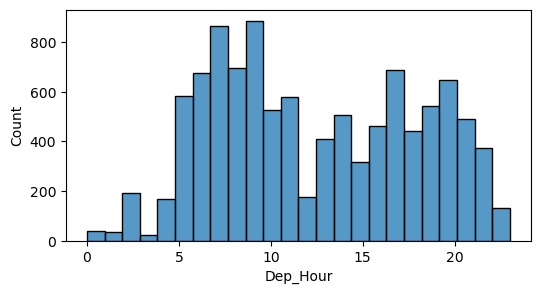

In [46]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="Dep_Hour",bins=24)

### Insights of Departure Hour

- 1. Most of the flights departure between **05:00 to 10:00**.
- 2. Very less amount of flight's departure at **12:00 to 04:00**.

<Axes: xlabel='Price', ylabel='Count'>

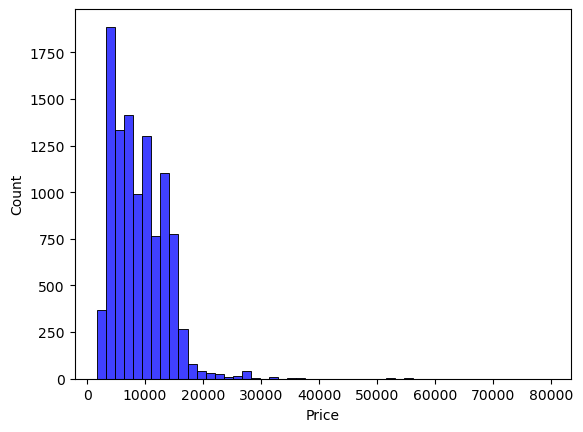

In [47]:
sns.histplot(data=df, x="Price",bins=50,color='blue')

### Insight of Price

- 1. Mostly it is left skewed.
- 2. Average Price for a flight is aorund **9,000** rupees
- 3. Very few passenger are paying more than **20,000** rupees

## Bivariate Analysis

<Axes: xlabel='Duration', ylabel='Price'>

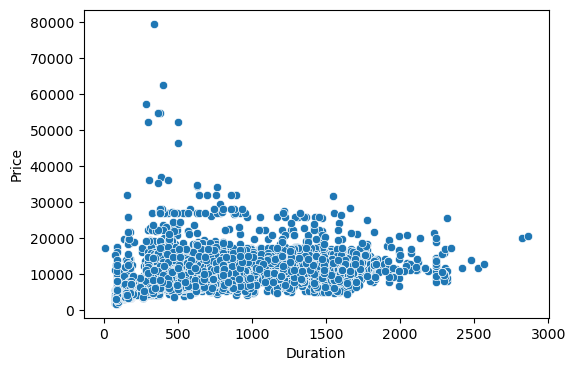

In [48]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Duration", y="Price")

### Insights for Price by Total duration in Minutes

- We can see that **Price** for flight is more as the total duration (minutes) is less.

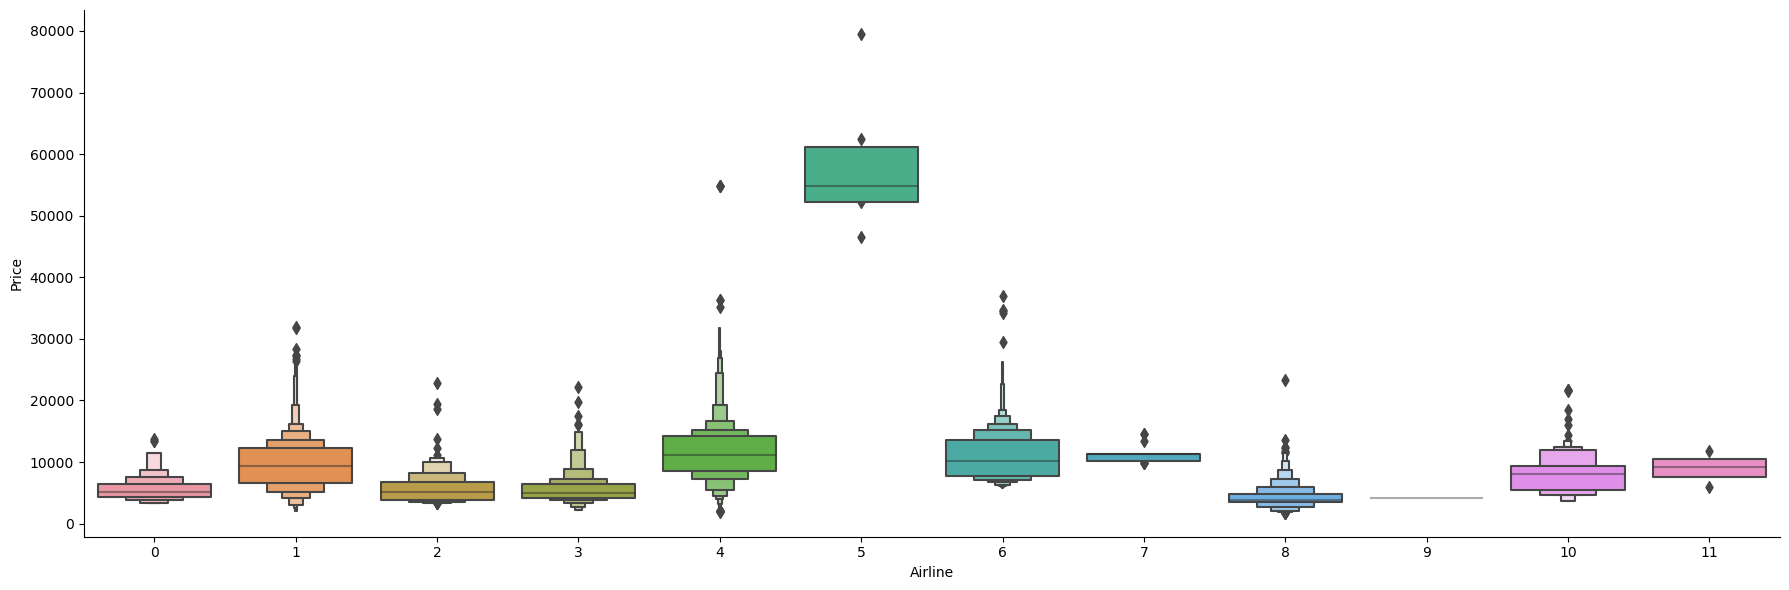

In [49]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

### Insights for Airline

- 1. **Jet Airways Business** is costliest compared to all the other airline ranging from 50,000 to 60,000 rupees.
- 2. Highest price for a airlins is also **Jet Airways Business** having Price of around 80,000.
- 3. Less number of passenger are travelling in **Trujet**.
- 4. Most of the **Airlin**e has Price between 5,000 to 15,000 rupees.

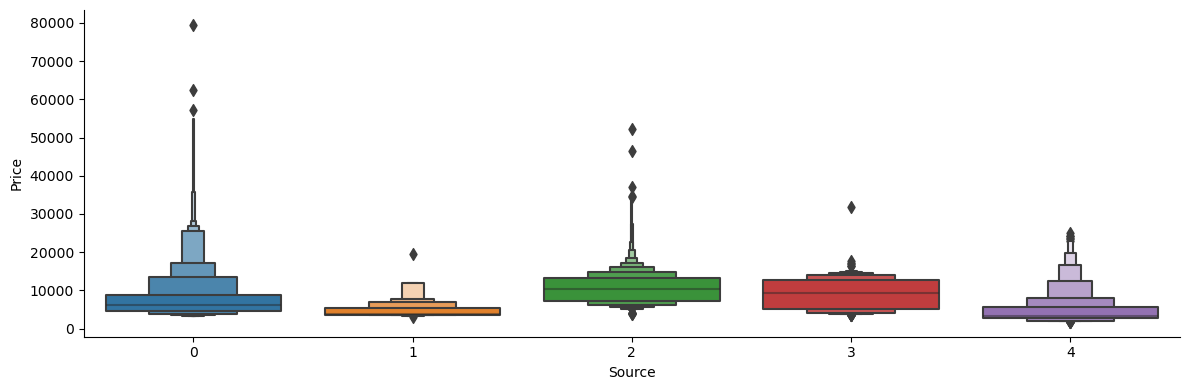

In [50]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

### Insights for Price by Source

- 1. People who are taking flight from **Banglore** are paying more than other source's.
- 2. Some passenger are paying around 80,000 rupees from **Banglore** .

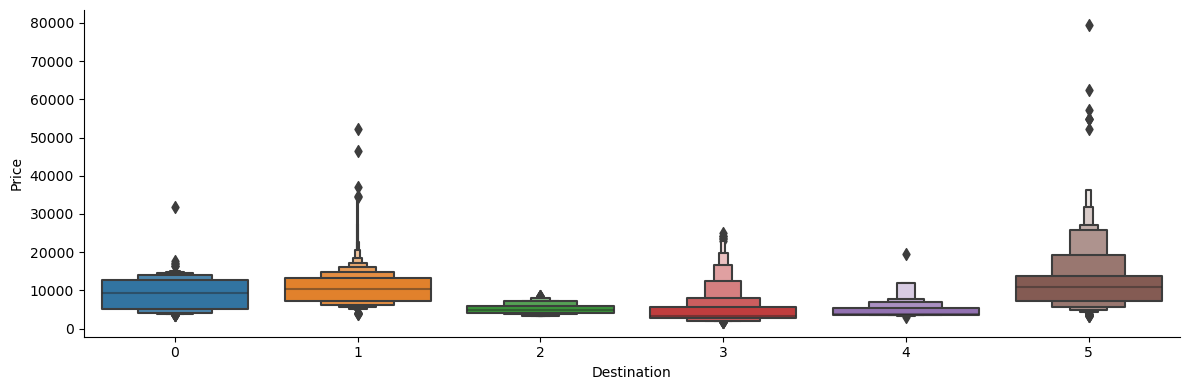

In [51]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

### Insights for Price by Destination

- Passenger's are paying more for travelling to **Delhi** as compared to other Destination.

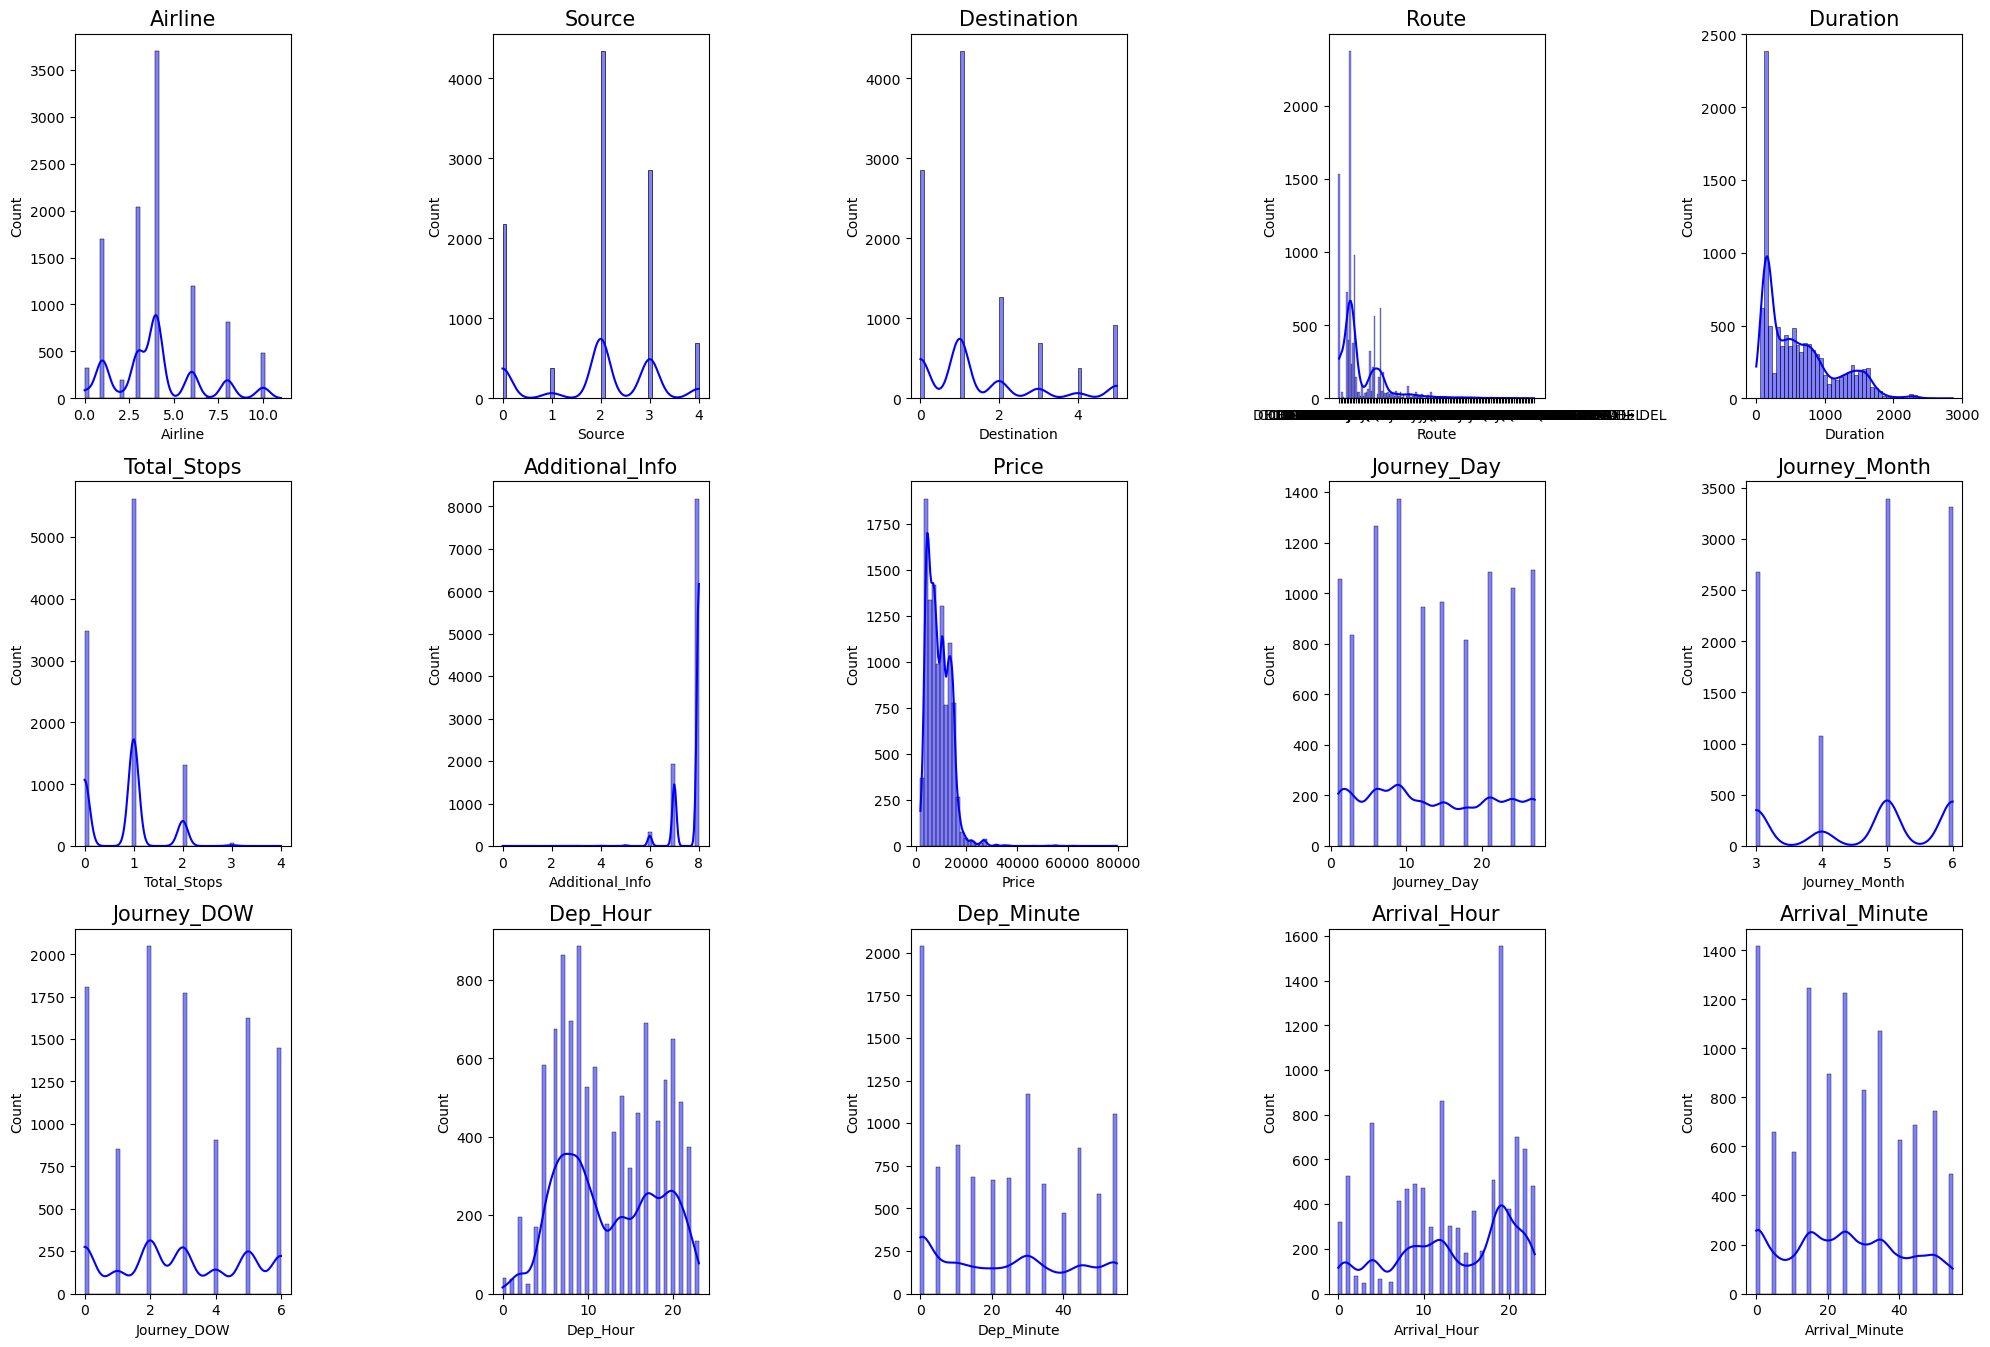

In [52]:
plt.figure(figsize=(20, 40))
plotnumber = 1
for column in df.columns:
    if plotnumber<=40:
        plt.subplot(9,5,plotnumber)
        sns.histplot(df[column], bins=50, kde=True,color='blue')
        plt.title(f'{column}',fontsize=15)
        plt.tight_layout()
    plotnumber += 1
plt.show()

### Insights

- There is no feature that has normal distribution.


# Multivariate Analysis

In [53]:
df.drop(columns='Route',axis=1,inplace=True)

In [54]:
df.sample()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_DOW,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
10615,4,0,2,175,0,8,7229,1,4,0,15,15,18,10


In [55]:
df.corr()["Price"]

Airline           -0.036491
Source             0.013796
Destination       -0.065875
Duration           0.501758
Total_Stops        0.602013
Additional_Info    0.017603
Price              1.000000
Journey_Day       -0.159044
Journey_Month     -0.113396
Journey_DOW        0.055846
Dep_Hour           0.005155
Dep_Minute        -0.024155
Arrival_Hour       0.031023
Arrival_Minute    -0.086163
Name: Price, dtype: float64

<Axes: >

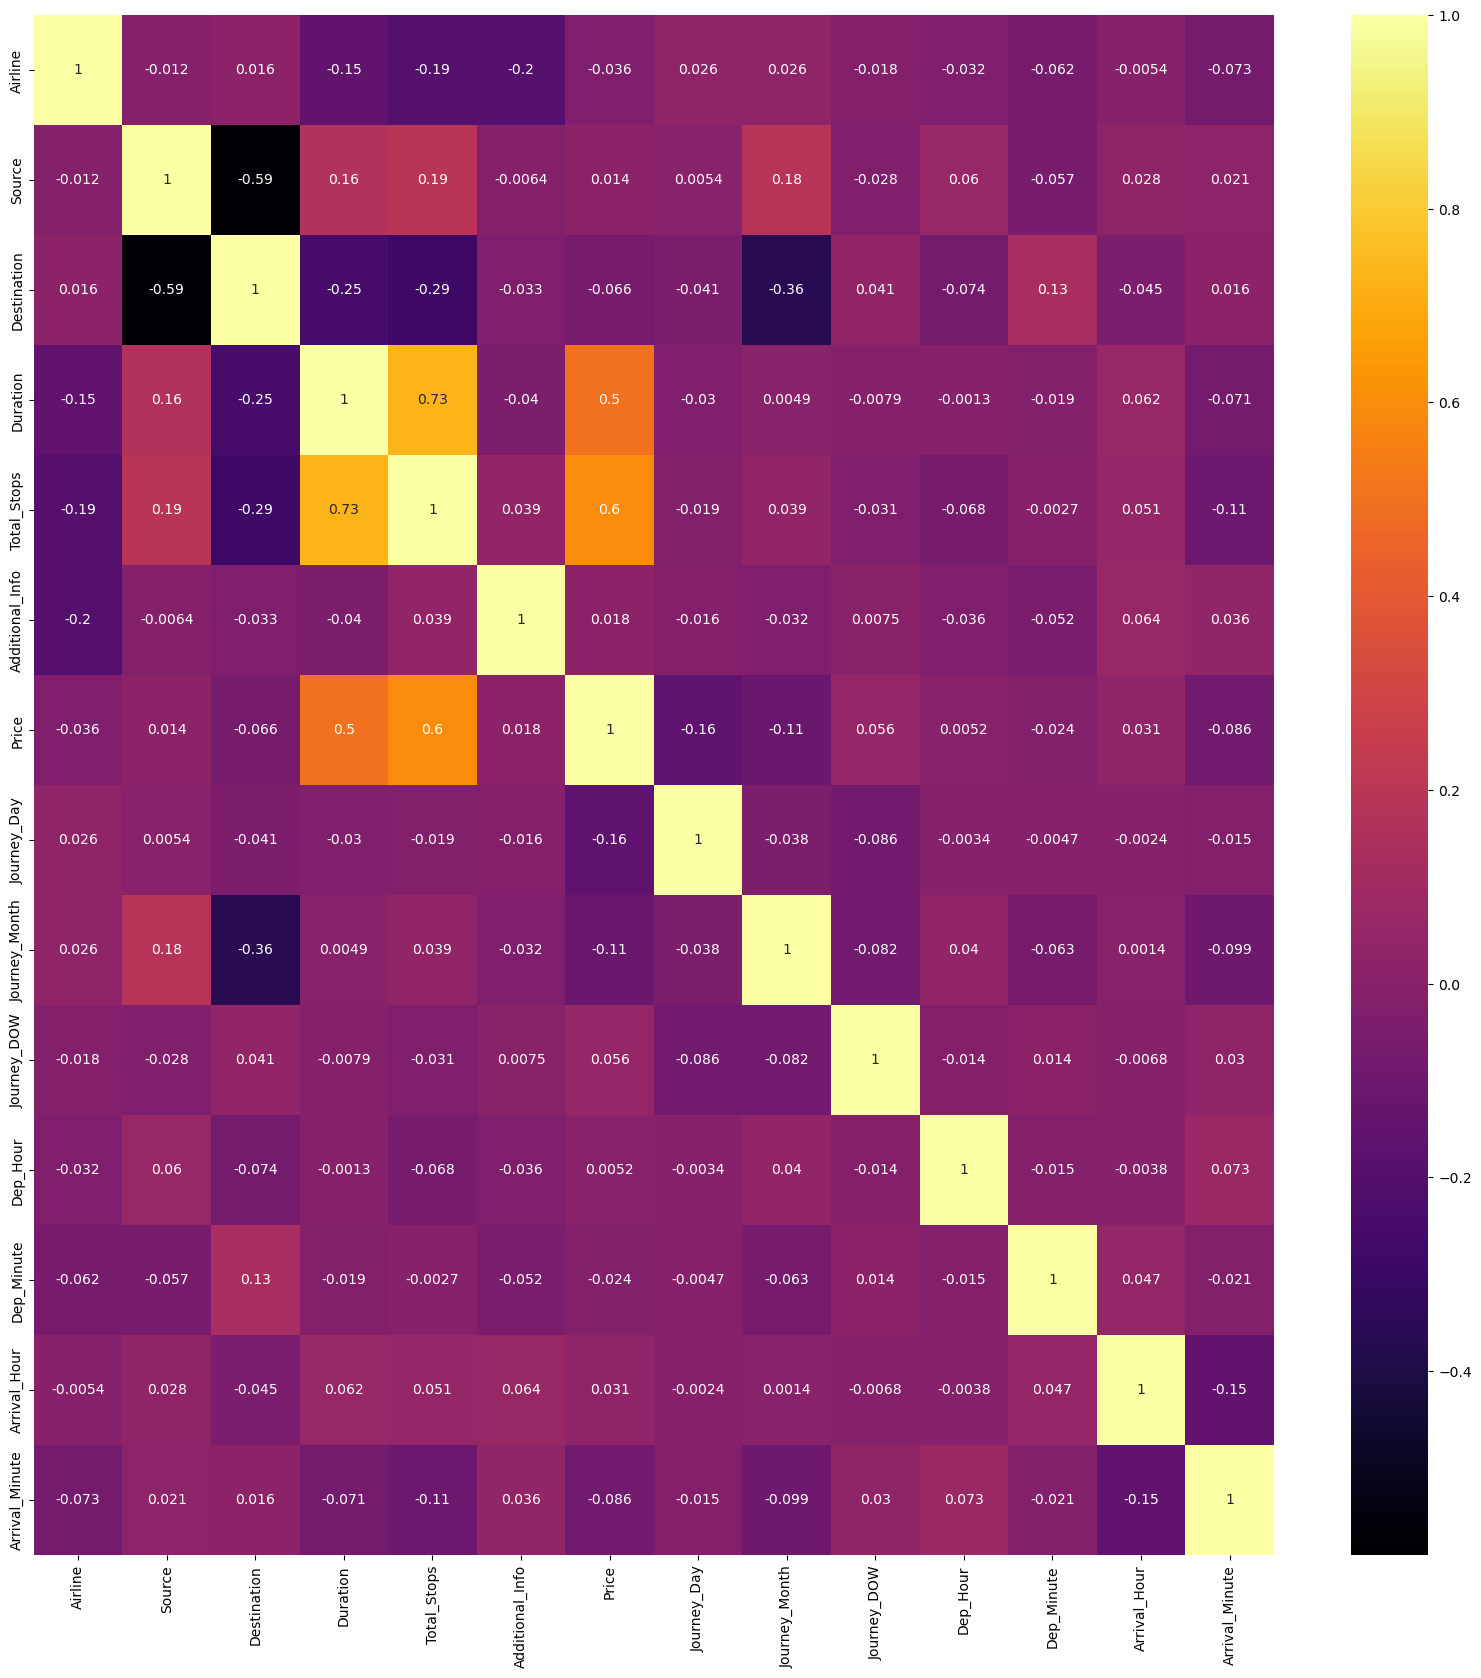

In [56]:
columns = [col for col in df.columns if df[col].nunique()>3]
plt.figure(figsize=(20,20))
sns.heatmap(df[columns].corr(),annot=True,cmap="inferno")

## Model Creation

In [57]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_DOW,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,3,0,5,170,0,8,3897,24,3,6,22,20,1,10
1,1,3,0,445,2,8,7662,1,5,2,5,50,13,15
2,4,2,1,1140,2,8,13882,9,6,6,9,25,4,25
3,3,3,0,325,1,8,6218,12,5,6,18,5,23,30
4,3,0,5,285,1,8,13302,1,3,4,16,50,21,35


In [58]:
X = df.drop("Price",axis=1)

In [59]:
y = df["Price"]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [63]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "SVR": SVR(kernel='rbf'),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "XGBoost Regression": XGBRegressor()
}

Model_name=[]
Model_acc=[]
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    print(name)
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"R^2 Score: {r2_score(y_test,y_pred):.4f}")
    print("-"*50)
    Model_name.append(name)
    Model_acc.append(f"{r2_score(y_test,y_pred):.4f}")

Linear Regression
MAE: 2434.4298
MSE: 11892132.3165
RMSE: 3448.4971
R^2 Score: 0.4430
--------------------------------------------------
Ridge Regression
MAE: 2434.4209
MSE: 11892193.5358
RMSE: 3448.5060
R^2 Score: 0.4430
--------------------------------------------------
Lasso Regression
MAE: 2434.3974
MSE: 11892500.9394
RMSE: 3448.5506
R^2 Score: 0.4430
--------------------------------------------------
ElasticNet Regression
MAE: 2636.9504
MSE: 13555382.1415
RMSE: 3681.7635
R^2 Score: 0.3651
--------------------------------------------------
SVR
MAE: 3090.7230
MSE: 18166432.5172
RMSE: 4262.2098
R^2 Score: 0.1492
--------------------------------------------------
Decision Tree Regression
MAE: 817.5928
MSE: 4783350.6435
RMSE: 2187.0873
R^2 Score: 0.7760
--------------------------------------------------
Random Forest Regression
MAE: 690.8956
MSE: 2447534.5765
RMSE: 1564.4598
R^2 Score: 0.8854
--------------------------------------------------
Gradient Boosting Regression
MAE: 1265.1472

In [64]:
table = pd.DataFrame({"Model Name" : Model_name,"R2 Score" : Model_acc})
table.sort_values(by="R2 Score",ascending=False,ignore_index=True)

,Model Name,R2 Score
0,XGBoost Regression,0.8974
1,Random Forest Regression,0.8854
2,Gradient Boosting Regression,0.8181
3,Decision Tree Regression,0.7760
4,Linear Regression,0.4430
5,Ridge Regression,0.4430
6,Lasso Regression,0.4430
7,ElasticNet Regression,0.3651
8,SVR,0.1492


-----

### Model comparision without hypermeter

- "XGBoost Regression" and "Random Forest Regression" are the only 2 model's that are giving the best accuracy among all the models.

- So, we will do hypermeter tuuning on both the models and see which of them will give best accuracy.

## Hyperparameter Tuning 

In [65]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [66]:
xgbreg = XGBRegressor()

In [67]:
xg_hyp = XGBRegressor(n_estimators= 575,
    learning_rate= 0.01,
    max_depth= 11,
    min_child_weight= 2,
    colsample_bytree= 0.8,
    gamma= 0.1,
    subsample=0.9,
    reg_lambda=1,
    reg_alpha=0.1)


In [68]:
xg_hyp.fit(X_train,y_train)
y_pred4 = xg_hyp.predict(X_test)

In [69]:
print(f"MAE: {mean_absolute_error(y_test, y_pred4):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred4):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred4)):.4f}")
print(f"R^2 Score: {r2_score(y_test,y_pred4):.4f}")

MAE: 695.0110
MSE: 1988809.5345
RMSE: 1410.2516
R^2 Score: 0.9069


In [70]:
rf_hyp = RandomForestRegressor(n_estimators=500, 
                                     max_depth=18, 
                                     min_samples_split=2, 
                                     min_samples_leaf=1, 
                                     max_features=8, 
                                     bootstrap=True, 
                                     random_state=42)

In [71]:
rf_hyp.fit(X_train,y_train)
y_pred5 = rf_hyp.predict(X_test)

In [72]:
r2score = r2_score(y_test,y_pred5)
print(r2score)

0.9000251491672371


In [73]:
print(f"MAE: {mean_absolute_error(y_test, y_pred5):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred5):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred5)):.4f}")
print(f"R^2 Score: {r2_score(y_test,y_pred5):.4f}")

MAE: 676.6944
MSE: 2134590.6747
RMSE: 1461.0238
R^2 Score: 0.9000


----

### Model comparision for Hypermeter

- Both "XGBRegressor" and "RandomForestRegressor" are giving 90% accruacy, but "XGBRegressor" is performing slightly better than "RandomForestRegressor".
- For "XGBRegressor" it is giving accuracy of 90.69%.

- **So, we will be selecting "XGBRegressor" as our generalized model.**

-----

# Report on Challenges faced

- When we were converting with categorical columns to numerical columns at that we did face some challenges on how to deal with that as it was our first time converting columns like that.

----

# Conclusion

- In conclusion, developing a successful flight fare prediction model in data science involves overcoming challenges related to dynamic data, temporal influences, and external factors, emphasizing the importance of accurate feature engineering, model adaptability, and ongoing updates to reflect changes in the aviation industry.